#**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#**Import Dataset**

In [2]:
#df = pd.read_csv("Heart_Disease_Project/data/clean_data.csv")
df = pd.read_csv("/content/heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,0,2,150.0,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108.0,1,1.5,2,2.5,3.0,1
2,67,1,4,120,229,0,2,129.0,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187.0,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172.0,0,1.4,1,0.0,3.0,0


#**Drop Target Feature**

In [3]:
X = df.drop("target", axis=1)
y = df["target"]

#**Scalling Data**

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#**PCA**

In [5]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#**Vizualize PCA**

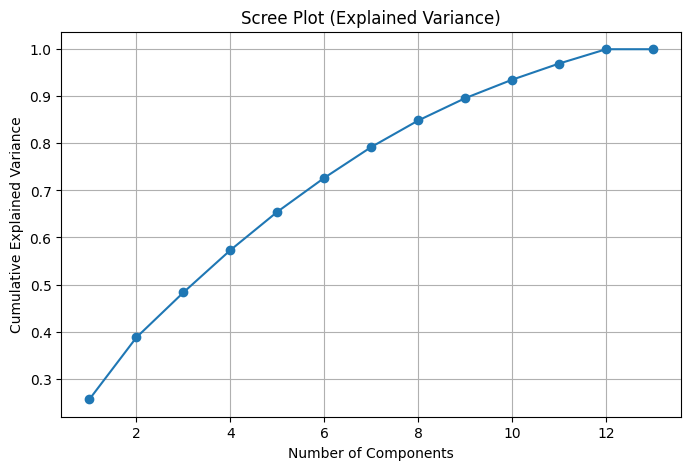

In [6]:
# Scree Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, X.shape[1]+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot (Explained Variance)")
plt.grid(True)
plt.show()

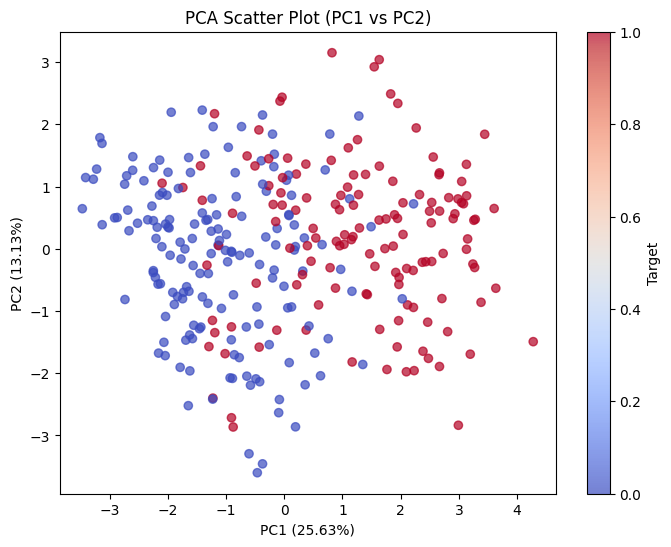

In [7]:
# Scatter Plot (PC1 vs PC2)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", alpha=0.7)
plt.xlabel("PC1 (%.2f%%)" % (pca.explained_variance_ratio_[0]*100))
plt.ylabel("PC2 (%.2f%%)" % (pca.explained_variance_ratio_[1]*100))
plt.title("PCA Scatter Plot (PC1 vs PC2)")
plt.colorbar(label="Target")
plt.show()

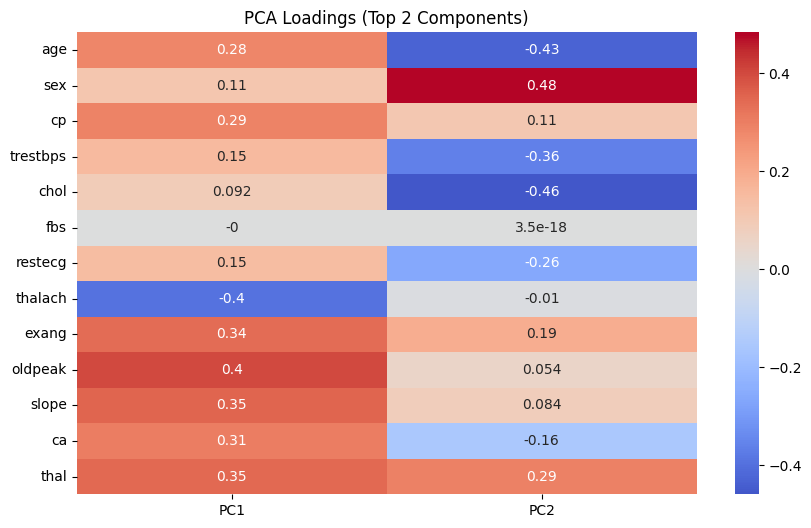

In [8]:
# Heatmap of PCA Loadings
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f"PC{i+1}" for i in range(len(X.columns))],
                        index=X.columns)

plt.figure(figsize=(10,6))
sns.heatmap(loadings.iloc[:,:2], annot=True, cmap="coolwarm", center=0)
plt.title("PCA Loadings (Top 2 Components)")
plt.show()

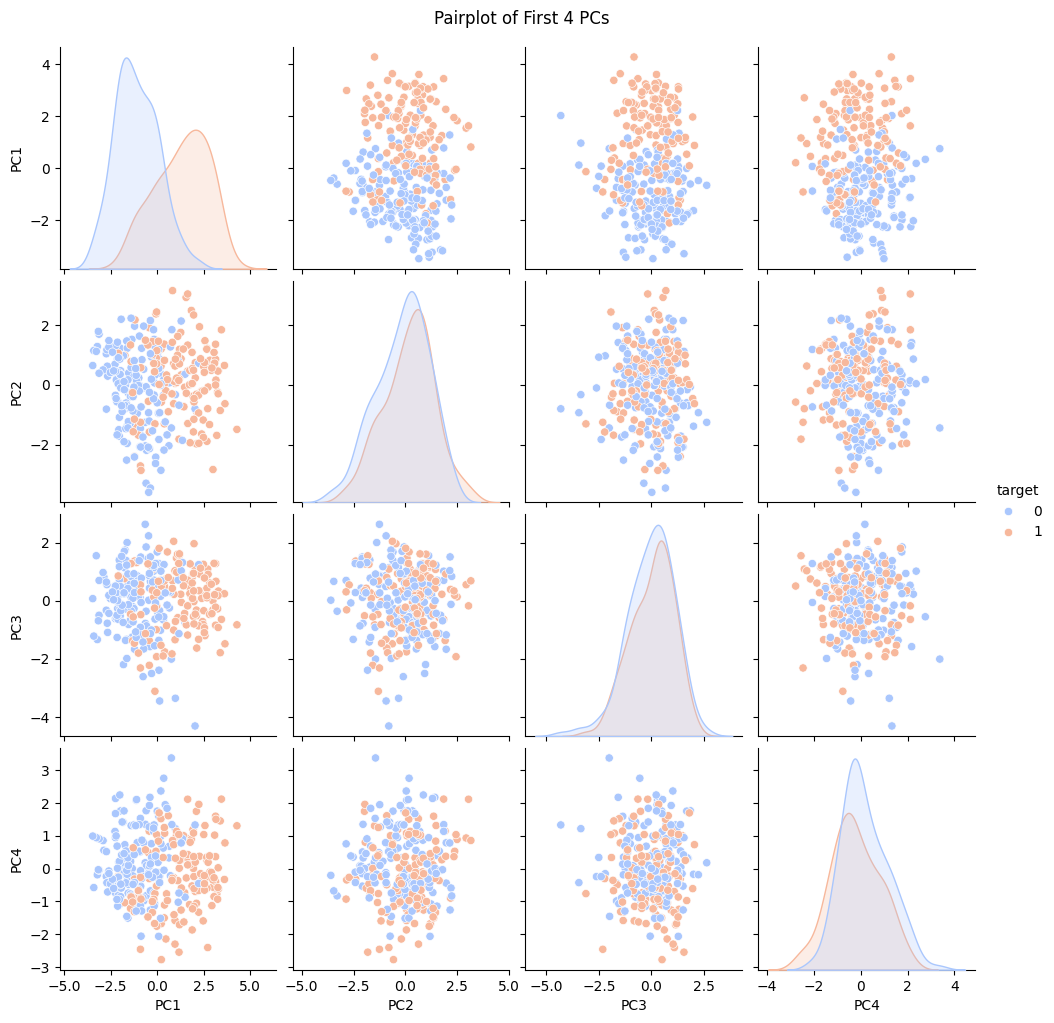

In [9]:
# Pairplot for first 4 PCs
pca_df = pd.DataFrame(X_pca[:,:4], columns=["PC1","PC2","PC3","PC4"])
pca_df["target"] = y.values

sns.pairplot(pca_df, hue="target", diag_kind="kde", palette="coolwarm")
plt.suptitle("Pairplot of First 4 PCs", y=1.02)
plt.show()

#**Apply The New PCA**

In [10]:
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

In [11]:
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(7)])
pca_df["target"] = y.values
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,target
0,0.970640,-0.331033,-3.355044,1.219388,0.272204,0.583883,0.293473,0
1,3.196207,-1.693723,0.278737,-0.770640,-0.142941,0.433701,-0.898184,1
2,3.281862,0.473612,0.333878,-0.621392,-0.172306,1.196343,0.123248,1
3,-0.394152,1.414028,-1.578909,2.174680,1.006846,-0.587741,2.300113,0
4,-2.248192,-0.382090,-0.613892,0.947922,0.914559,0.707019,-0.114009,0


#**Save Data**

In [12]:
#pca_df.to_csv("Heart_Disease_Project/data/pca_data.csv", index=False)
pca_df.to_csv("heart_disease_pca", index=False)